# Assignment #2 - Classification

<font color="red"> <b> Due: April 10  EOD</b> </font>

<font color="blue"> Ashwin Ashok </font>

# I. Introduction

The goal of this assignment is to compare classification models on a set of data that measures whether or not a client will subscribe to a term deposit. The classifiers are implemented using the prml library, and the basis of classification are precision, accuracy and recall, which are all derived from the confusion matrix for each classifier.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/bank+marketing
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (data download link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip)



The second dataset was chosen. It is a 16 feature dataset with 45,211 data points per feature. The output is a binary classification (yes or no), and is thus readily usable by the prml library (i.e. no adjustments have to be made to the source code to make it compatible with multiclass problems, since the target only has two classes). The main complication in applying classifiers to this data is that some features are defined by strings. In order to apply the prml classification methods, these must be converted to numerical format. Below, the number of unique values in each feature are shown. It can be said that there is a mix of discrete and (comparatively) continuous variables. Given that the data is not binary, this also suggests that scaling may be necessary for normalization.


In [34]:
df = pd.read_csv('bank-full.csv',delimiter=';')
feature_cols = df.columns.to_list()
feature_cols.remove('y')
x_input = np.asarray(df[feature_cols])
y_input = np.asarray(df['y'])

for col in range(x_input.shape[1]):
    unique = len(np.unique(x_input[:,col]))
    print(unique)

77
12
3
4
2
7168
2
2
3
31
12
1573
48
559
41
4


# III. Method

Summarize the Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network.
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
Each implementation will be followed by a separate cell that should include
 - review of the 4 classification models 
 - your implementation and description


### Least Mean Square

#### Review
Least Mean Squares (LMS) is a classificaiotn method where the decision boundaries are found by minimizing the error function for all components of the label. The minimization computation involves finding the pseudoinverse, using which the optimal (minimum) error value and its associated decision boundary can be found. The major drawbacks of this method is that it is sensitive to outliers and is computationally expensive.

#### Implementation and Description
The prml library function LeastSquaresClassifier is used to generate the fit. The confusion matrix for the fit is then generated using sklearn, and the accuracy, precision and recall are calcualted using empirical formulae.



### Fisher Linear Discriminant

#### Review
The Fisher Linear Discriminant is a method of classification that accounts for high variance (possibly by presence of many outliers) within a class. It seeks to maximize the fisher criterion, which is the ratio of inter-class means to intra-class variance. In other words, it seeks to maximize separation between classes, whike giving a small variance within each class.

#### Implementation and Description
The prml function LogisticRegression() is used to generate the fit. The confusion matrix is used as previously described.



### Logistic Regression

#### Review
Logistic regression is a probabilistic method of classification. It is type of probabilitic discrimative model. This means that LR does not make assumptions about the structure of the class, and uses the explicit form of the structure. It thus calculates the probabiity of a class without finding the priors in the process, leading to fewer parameters.

#### Implementation and Description
The prml function Perceptron() is used to generate the fit. The confusion matrix is used as previously described.


### Perceptron

#### Review
Perceptrons consist of inputs, weight layers, and thresholds. This method also uses a stochastic gradient descent, but only updates the weights if the predicted value was misclassified. The major drawback of this method is that it is not guaranteed to converge if the data is not linearly separable. In other words, if the decision boundary for the data is not a straight line, it cannot solve the classification problem.

#### Implementation and Description
The prml function Perceptron() is used to generate the fit. The confusion matrix is used as previously described.


# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
! pip install prml
from prml.preprocess import PolynomialFeature
from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron,
    SoftmaxRegression
)
import matplotlib.pyplot as plt
from prml import nn
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Importing Data
df = pd.read_csv('bank-full.csv',delimiter=';')
feature_cols = df.columns.to_list()
feature_cols.remove('y')
x_input = np.asarray(df[feature_cols])
y_input = np.asarray(df['y'])

label_encoder = LabelEncoder()
for col in range(x_input.shape[1]):
    if type(x_input[0,col]) == str:
        x_input[:,col] = label_encoder.fit_transform(x_input[:,col])

y_input = label_encoder.fit_transform(y_input)

x_scaled = np.zeros(x_input.shape)
for col in range(x_input.shape[1]):
    min_arr = min(x_input[:,col])
    scale_factor = 1/(max(x_input[:,col])-min(x_input[:,col]))
    x_scaled[:,col] = (x_input[:,col] - min_arr)*scale_factor 

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_input,train_size=0.8,random_state=42)

#### Description
This section imports all relevant libraries. Then it reads the data and assigns it to a pandas dataframe. The feature and target variables columns are extracted (x_input and y_input). Then, the features are encoded using LabelEncoder(), and this is applied only to columns which have non-integer data. The features are then scaled in order to normalize them, using the formula x-min(x)/min(x)-max(x). Finally, the data is split into 80% training data and 20% test data, and assigned an integer random state for repeatability.

In [36]:
#Least Mean Square
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(X_train, y_train)
y_lms = model.classify(X_test)

cm = confusion_matrix(y_test, y_lms)
tp = cm[1,1] #True positive
fp = cm[0,1] #False positive
tn = cm[0,0] #True negative
fn = cm[1,0] #False negative

print(cm)
acc_lms = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy = ',acc_lms)
prec_lms = tp/(tp+fp)
print('Precision = ',prec_lms)
rec_lms = tp/(tp+fn)
print('Recall = ',rec_lms)

[[7872   80]
 [ 952  139]]
Accuracy =  0.8858785801172178
Precision =  0.634703196347032
Recall =  0.12740604949587533


#### Description
This section implements the Least Mean Squares Classifier. The LeastSquaresClassfier() command from prml is used. The confusion matrix is derived and the accuracy, recall and precision are found for each. The outputs are the confusion matrix, accuracy, precision and recall. These metrics are a good measure of how well the model fits the data and how reliable it is at predicting relevant results. The same structure of code is used for all of the following sections, but different classifiers are implemented.

In [37]:
#Logistic Regression
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_lr = logistic_regression.classify(X_test)


cm = confusion_matrix(y_test, y_lr)
tp = cm[1,1] #True positive
fp = cm[0,1] #False positive
tn = cm[0,0] #True negative
fn = cm[1,0] #False negative

print(cm)
acc_lr = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy = ',acc_lr)
prec_lr = tp/(tp+fp)
print('Precision = ',prec_lr)
rec_lr = tp/(tp+fn)
print('Recall = ',rec_lr)

[[7793  159]
 [ 854  237]]
Accuracy =  0.8879796527700984
Precision =  0.5984848484848485
Recall =  0.21723189734188816


In [38]:
#Fisher Linear Discriminant
model = FishersLinearDiscriminant()
model.fit(x_train, y_train)
y_fish = model.classify(x_test)

cm = confusion_matrix(y_test, y_fish)
tp = cm[1,1] #True positive
fp = cm[0,1] #False positive
tn = cm[0,0] #True negative
fn = cm[1,0] #False negative

print(cm)
acc_fish = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy = ',acc_fish)
prec_fish = tp/(tp+fp)
print('Precision = ',prec_fish)
rec_fish = tp/(tp+fn)
print('Recall = ',rec_fish)

[[6450 1502]
 [ 241  850]]
Accuracy =  0.8072542297909986
Precision =  0.36139455782312924
Recall =  0.7791017415215399


In [39]:
#Perceptron
model = Perceptron()
model.fit(x_train, y_train)
y_perc = model.classify(x_test)

cm = confusion_matrix(y_test, y_perc)
tp = cm[1,1] #True positive
fp = cm[0,1] #False positive
tn = cm[0,0] #True negative
fn = cm[1,0] #False negative

print(cm)
acc_perc = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy = ',acc_perc)
prec_perc = tp/(tp+fp)
print('Precision = ',prec_perc)
rec_perc = tp/(tp+fn)
print('Recall = ',rec_perc)

[[   0 7952]
 [   0 1091]]
Accuracy =  0.1206458033838328
Precision =  0.1206458033838328
Recall =  1.0


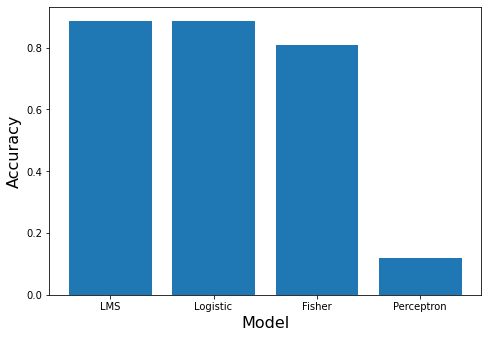

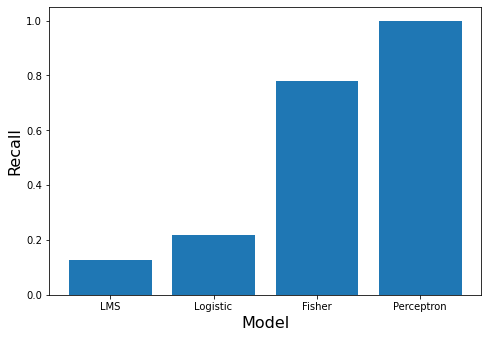

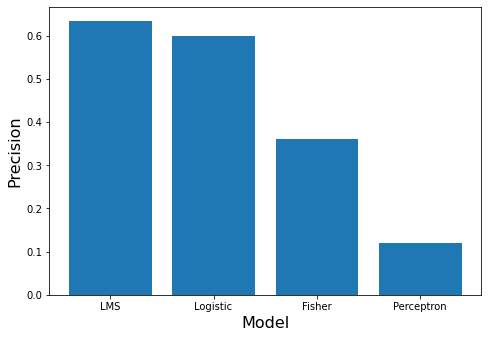

In [40]:
#Comparison

#Accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LMS', 'Logistic', 'Fisher', 'Perceptron']
accs = [acc_lms,acc_lr,acc_fish,acc_perc]
ax.bar(models,accs)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

#Recall
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LMS', 'Logistic', 'Fisher', 'Perceptron']
accs = [rec_lms,rec_lr,rec_fish,rec_perc]
ax.bar(models,accs)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

#Precision
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LMS', 'Logistic', 'Fisher', 'Perceptron']
accs = [prec_lms,prec_lr,prec_fish,prec_perc]
ax.bar(models,accs)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.show()

#### Description
This section of code compares the classifiers based on plots of accuracy, precision and recall. The bar plot from matplotlib are used.

### Discussion of Results

The plots shown above are discussed in this section. Note that there no plots are provided with classification boundaries since the data has 16 features. It is not possible to provide a plot for data with more than 2 features, and experiments in choosing 2 features to base the plot on provided uninformative graphs. It is likely the case that there are no two major features in the given data, and that isolating two featrues would not be informative on its own.

#### Accuracy Comparison
Least Mean Squared (LMS) and Logistic regression (LR) have the highest, and almost identical, accuracy scores. This suggests that the models developed with the LMS and LR models most closely matched the test set. They have accuracies of 0.8858 and 0.8879 respectively. Heuristically, these accuracies are rather high and suggest that the provided features are well-correlated with the target (whether or not a client will subscribe to a term deposit).


#### Recall Comparison
The order from accuracy seems to be reversed in the plot of recalls, where Perceptron (P) has by far the highest recall. However,this may not be a good measurement of the classifier's effectiveness. Recall measures the % of total relevant results that have been correctly classified. The perceptron's confusion matrix suggests that there are 0 false negatives by several false positives in the predicted values. So, all the values of the perceptrons output are 1, thereby making the recall value unreliable when considered in isolation. The reason for this is unclear, but it may be because the data is not linearly separable and thus the perceptron failed to generate a proper model. Another reason may be that the source code for the perceptron is not made to handle more than two features, whereas the provided data has 16 features.

These results also imply that the most accurate models may have a bias against positive predictions. This is because a low recall suggests a greater number of false negatives. This can be fixed by lowering the decision boundary.

#### Precision Comparison
Precision measures the % of relevant results that are accurate. The precision plot suggests that LMS leads to the highest precision, with LR being a close second. This indicates that a positive prediction in LMS and LR are more reliable than a positive prediction by the other models.


# Conclusions

#### Summarize your work here.

Using the PRML library to apply the Least Mean Squares, Fisher Linear Discriminant, Perceptron, and Logistic Regression Classifiers on the second data set, the accuracy, precision and recall of the predicted value for each model was studied. It was found that the LMS model led to the highest precision (0.635), and was approximately equal to the highest accuracy (0.886). Perceptron had the highest recall, but this was found to be due a bias towards false positives. LMS had the lowest recall (0.127), but this can be combatted by lowering the decision boundary. Given that Logistic Regression has the (marginally) highest accuracy (0.888), and a similar precision to LMS (0.598) while having a much higher recall (0.211), it is the best classifier for the given data.


#### Discuss the challenges or somethat that you learned.
One of the main challenges was figuring out how to plot the classifier. I learned that for more than 2 features, it is not akways possible to plot the classifier results and the decision boundary.


#### If you have any suggestion about the assignment, you can write about it.
It was a little unclear what went under each section of the assignment. I was not sure if implementation was supposed to go under methods (as is implied in the guide under methods) and of what was supposed to be in the experiments section.


# References

Bishop Textbook, Lecture Notes